API key: 71F522PIQRFAFZZO

In [79]:
import os
import json
import requests

import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt


In [72]:
os.makedirs("data", exist_ok=True)
os.makedirs("visualisations", exist_ok=True)

intraday data

In [58]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GME&outputsize=full&interval=60min&apikey=71F522PIQRFAFZZO'
r = requests.get(url)
gme_intraday_data = r.json()

with open("data/gme_intraday_data.json", "w") as f:
    json.dump(gme_intraday_data, f)

In [59]:
# First, the JSON data was read into a DataFrame
gme_df_uploaded = pd.read_json('data/gme_intraday_data.json')

# Extracting the time series data from the 'Time Series (60min)' column
time_series_data = gme_df_uploaded['Time Series (60min)'].dropna().to_dict()

# Creating a new DataFrame with the structured data
gme_transformed_df = pd.DataFrame.from_dict(time_series_data, orient='index')
gme_transformed_df.reset_index(inplace=True)
gme_transformed_df.rename(columns={'index': 'Date/Time'}, inplace=True)

# Displaying the first few rows of the transformed DataFrame
gme_transformed_df.head()


,Date/Time,1. open,2. high,3. low,4. close,5. volume
0,2023-11-24 17:00:00,12.2000,12.2000,12.2000,12.2000,64882
1,2023-11-24 16:00:00,12.2900,12.3000,12.2200,12.2800,1905
2,2023-11-24 15:00:00,12.2480,12.3000,12.2000,12.2600,66116
3,2023-11-24 14:00:00,12.2500,12.2500,12.2000,12.2300,1322
4,2023-11-24 13:00:00,12.2150,12.3100,12.2000,12.2200,204044


daily data

In [66]:
# File path for the JSON data
file_path = "data/gme_daily_data.json"

# Check if the file already exists
if not os.path.exists(file_path):
    # Fetch the data only if the file does not exist
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GME&outputsize=full&apikey=71F522PIQRFAFZZO'
    response = requests.get(url)
    gme_daily_data = response.json()

    # Save the data to a JSON file
    with open(file_path, "w") as file:
        json.dump(gme_daily_data, file)

In [67]:
# Reading the JSON file
gme_daily_data_df = pd.read_json('data/gme_daily_data.json')

# Extracting the relevant time series data
time_series_daily_data = gme_daily_data_df['Time Series (Daily)'].dropna().to_dict()

# Creating a new DataFrame with the structured data
gme_daily_transformed_df = pd.DataFrame.from_dict(time_series_daily_data, orient='index')
gme_daily_transformed_df.reset_index(inplace=True)
gme_daily_transformed_df.rename(columns={'index': 'Date', '1. open': 'Open', '2. high': 'High', '3. low': 'Low', '4. close': 'Close', '5. volume': 'Volume'}, inplace=True)
gme_daily_transformed_df_sorted = gme_daily_transformed_df.sort_index()

# Displaying the first few rows of the transformed DataFrame
gme_daily_transformed_df_sorted.head()




,Date,Open,High,Low,Close,Volume
0,2023-11-24,12.2200,12.4100,12.1750,12.2000,1232474
1,2023-11-22,12.5600,12.7100,12.1901,12.2900,2362461
2,2023-11-21,12.6500,12.7200,12.2550,12.5500,3710097
3,2023-11-20,13.0000,13.2000,12.8000,12.8000,2301584
4,2023-11-17,12.5200,13.0550,12.5200,13.0300,3422596


Changing datatypes

In [69]:
gme_daily_transformed_df = gme_daily_transformed_df.astype({
    'Date': 'datetime64[ns]',
    'Open': 'float',
    'High': 'float',
    'Low': 'float',
    'Close': 'float',
    'Volume': 'float'
})

Plotting a Candlestick Chart of GME Stock Price during the Gamestop short squeeze

In [89]:
# Filtering the DataFrame to include only data from December 2020 to April 2021 and creating a copy
gme_jan_apr2021_df = gme_daily_transformed_df[(gme_daily_transformed_df['Date'] >= '2020-12-01') & (gme_daily_transformed_df['Date'] <= '2021-04-30')].copy()

# Ensure 'Date' is the index
gme_jan_apr2021_df.set_index('Date', inplace=True)

# Sorting the DataFrame by 'Date' in ascending order
gme_jan_apr2021_df.sort_index(inplace=True)

# Plotting the OHLC candlestick chart
mpf.plot(gme_jan_apr2021_df, 
         type='candle', 
         style='yahoo', 
         volume=True, 
         #tight_layout=True,
         datetime_format='%b %d, %Y',
         xrotation=45,
         title='GME Stock Price (Dec 2020-Apr 2021)',
         savefig='visualisations/gme_stock_price_candlestick_chart.png')


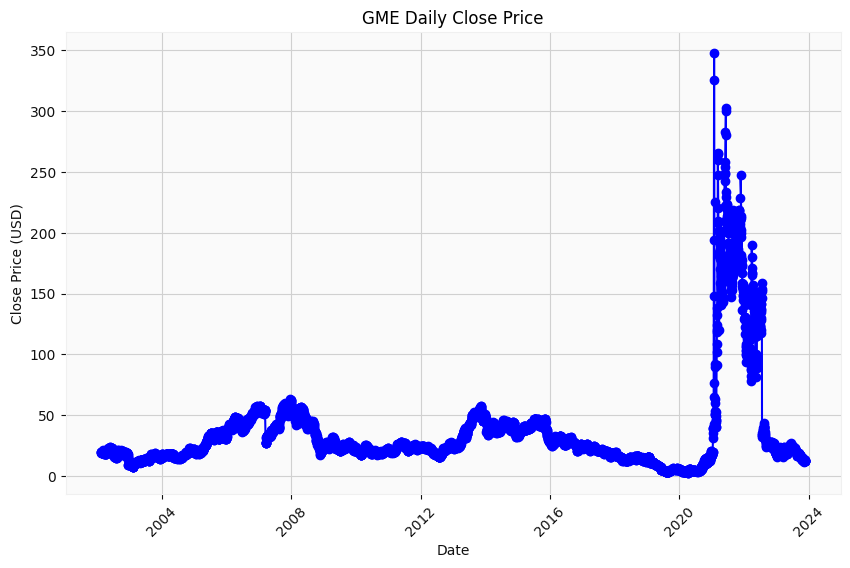

In [65]:
# Plotting the 'Close' price against the 'Date'
plt.figure(figsize=(10, 6))
plt.plot(gme_daily_transformed_df['Date'], gme_daily_transformed_df['Close'], color='blue', marker='o')
plt.title('GME Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()